In [1]:
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import analysis.retroBO_analysis_functions as fns
import pickle

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use(pl.Path(os.getcwd())/'analysis/mystyle.mplstyle')
inch_conversion = 3.93701/100
page_width = 142.4 *inch_conversion
column_width = 67.2* inch_conversion

# Exploring the effect of latent dimensions on the performance of LMC and LVMOGP

Notebook for plotting the results of the cross validation experiments with different ranks for the LMC and different latent space dimensions for the LVMOGP.

In [2]:
save=True # whether to save
params=['r', 'm']

Load the data

In [3]:

path_name = pl.Path(os.getcwd()) /'results'

X_valid_df_10 = pd.read_csv(path_name/'cross_validation_10_latent.csv', index_col=0)
X_valid_df_2 = pd.read_csv(path_name/'cross_validation.csv', index_col=0)

Create a dataframe which is just the RMSE and NLPD of the test points on all the surfaces at each iteration, rather than
each surface seperately.

Also ensure all values of % train have the same number of runs.

In [4]:
X_valid_df_10 = pd.read_csv(path_name/'cross_validation_10_latent.csv', index_col=0)
X_valid_df_2 = pd.read_csv(path_name/'cross_validation.csv', index_col=0)

for col in X_valid_df_10.columns:
    if 'lmc' in col:
        X_valid_df_10[f'lmc10_{col[4:]}'] = X_valid_df_10[col]
        X_valid_df_10.drop(columns=col, inplace=True)
    if 'lvm' in col:
        X_valid_df_10[f'lvm10_{col[4:]}'] = X_valid_df_10[col]
        X_valid_df_10.drop(columns=col, inplace=True)
    if 'mo_indi' in col:
        X_valid_df_10.drop(columns=col, inplace=True)
    if 'avg' in col:
        X_valid_df_10.drop(columns=col, inplace=True)

for col in X_valid_df_2.columns:
    if 'lmc' in col:
        X_valid_df_2[f'lmc2_{col[4:]}'] = X_valid_df_2[col]
        X_valid_df_2.drop(columns=col, inplace=True)
    if 'lvm' in col:
        X_valid_df_2[f'lvm2_{col[4:]}'] = X_valid_df_2[col]
        X_valid_df_2.drop(columns=col, inplace=True)
    if 'mo_indi' in col:
        X_valid_df_2.drop(columns=col, inplace=True)



In [5]:

for df in [X_valid_df_2, X_valid_df_10]:

    n_runs_Xvalid = fns.get_number_of_runs_Xvalid(df)
    all_results_df = df[(df.index == 'all')]
    print(n_runs_Xvalid)

pct_train  0.10  0.15  0.20  0.25  0.30  0.35  0.40  0.45  0.50  0.55  0.60  \
n_runs      201   201   201   201   201   201   201   201   201   201   201   

pct_train  0.65  0.70  0.75  0.80  0.85  0.90  
n_runs      201   201   201   201   201   201  
pct_train  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
n_runs     150  149  149  150  150  146  109   70   73


In [6]:
print(X_valid_df_10.index)
print(X_valid_df_2.columns)

Index(['FP004-RP004-Probe', 'FP001-RP001x-EvaGreen', 'FP001-RP001x-Probe',
       'RP001x-FP002-Probe', 'FP002-RP002x-EvaGreen', 'FP005-FP001-EvaGreen',
       'RP002x-FP005-Probe', 'FP005-FP004-EvaGreen', 'FP004-FP005-Probe',
       'FP005-FP001-Probe',
       ...
       'RP008x-FP005-Probe', 'FP004-RP004-EvaGreen', 'FP002-RP002x-Probe',
       'FP005-FP004-EvaGreen', 'RP002x-FP005-Probe', 'FP001-RP004-EvaGreen',
       'RP002x-FP004-EvaGreen', 'FP002-RP004-EvaGreen',
       'RP002x-FP002-EvaGreen', 'all'],
      dtype='object', length=43548)
Index(['no test points', 'no train points', 'avg_test_RMSE', 'avg_test_NLPD',
       'avg_test_RMSE_z', 'avg_test_NLPD_z', 'avg_train_RMSE',
       'avg_train_NLPD', 'avg_train_RMSE_z', 'avg_train_NLPD_z', 'seed',
       'n_train', 'pct_train', 'param', 'lmc2_test_RMSE', 'lmc2_test_NLPD',
       'lmc2_test_RMSE_z', 'lmc2_test_NLPD_z', 'lvm2_test_RMSE',
       'lvm2_test_NLPD', 'lvm2_test_RMSE_z', 'lvm2_test_NLPD_z',
       'lmc2_train_RMSE', 'lmc

In [7]:
X_valid_df_10 = X_valid_df_10[X_valid_df_10.index == 'all']
X_valid_df_2 = X_valid_df_2[X_valid_df_2.index == 'all']

In [8]:
X_valid_df = pd.merge(X_valid_df_10, X_valid_df_2, on=['no test points', 'no train points', 'seed',
       'n_train', 'pct_train', 'param'], how='inner')

In [9]:
print(X_valid_df.head().to_string())

   no test points  no train points  seed  n_train  pct_train param  lmc10_test_RMSE  lmc10_test_NLPD  lmc10_test_RMSE_z  lmc10_test_NLPD_z  lvm10_test_RMSE  lvm10_test_NLPD  lvm10_test_RMSE_z  lvm10_test_NLPD_z  lmc10_train_RMSE  lmc10_train_NLPD  lmc10_train_RMSE_z  lmc10_train_NLPD_z  lvm10_train_RMSE  lvm10_train_NLPD  lvm10_train_RMSE_z  lvm10_train_NLPD_z  avg_test_RMSE  avg_test_NLPD  avg_test_RMSE_z  avg_test_NLPD_z  avg_train_RMSE  avg_train_NLPD  avg_train_RMSE_z  avg_train_NLPD_z  lmc2_test_RMSE  lmc2_test_NLPD  lmc2_test_RMSE_z  lmc2_test_NLPD_z  lvm2_test_RMSE  lvm2_test_NLPD  lvm2_test_RMSE_z  lvm2_test_NLPD_z  lmc2_train_RMSE  lmc2_train_NLPD  lmc2_train_RMSE_z  lmc2_train_NLPD_z  lvm2_train_RMSE  lvm2_train_NLPD  lvm2_train_RMSE_z  lvm2_train_NLPD_z
0             NaN              NaN     1       21        0.1     r         0.131893         1.989455           0.813932           3.809338              NaN              NaN                NaN                NaN          0.037

In [10]:
if X_valid_df is not None:
    n_runs_Xvalid = fns.get_number_of_runs_Xvalid(X_valid_df)
    all_results_df = X_valid_df[(X_valid_df.index == 'all') & (X_valid_df['seed'] < 200)]
    print(n_runs_Xvalid)

pct_train  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
n_runs     150  149  149  150  150  146  109   70   73


Ensure all have 70 random seed runs as some have more runs.

In [20]:
smaller_dfs = []

for  pct_train in X_valid_df['pct_train'].unique():
    temp_df = X_valid_df[X_valid_df['pct_train'] == pct_train]
    seeds = temp_df['seed'].unique()
    seeds = seeds[:70]
    temp_df = temp_df[temp_df['seed'].isin(seeds)]
    smaller_dfs.append(temp_df)

X_valid_df = pd.concat(smaller_dfs)

In [21]:
if X_valid_df is not None:
    n_runs_Xvalid = fns.get_number_of_runs_Xvalid(X_valid_df)
    print(n_runs_Xvalid)

pct_train  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
n_runs      70   70   70   70   70   70   70   70   70


In [22]:
X_valid_df = X_valid_df[['no test points', 'no train points', 'seed', 'n_train', 'pct_train',
       'param', 'lmc10_test_RMSE', 'lmc10_test_NLPD', 'lmc10_test_RMSE_z',
       'lmc10_test_NLPD_z', 'lvm10_test_RMSE', 'lvm10_test_NLPD',
       'lvm10_test_RMSE_z', 'lvm10_test_NLPD_z', 'lmc10_train_RMSE',
       'lmc10_train_NLPD', 'lmc10_train_RMSE_z', 'lmc10_train_NLPD_z',
       'lvm10_train_RMSE', 'lvm10_train_NLPD', 'lvm10_train_RMSE_z',
       'lvm10_train_NLPD_z', 'lmc2_test_RMSE', 'lmc2_test_NLPD',
       'lmc2_test_RMSE_z', 'lmc2_test_NLPD_z', 'lvm2_test_RMSE',
       'lvm2_test_NLPD', 'lvm2_test_RMSE_z', 'lvm2_test_NLPD_z',
       'lmc2_train_RMSE', 'lmc2_train_NLPD', 'lmc2_train_RMSE_z',
       'lmc2_train_NLPD_z', 'lvm2_train_RMSE', 'lvm2_train_NLPD',
       'lvm2_train_RMSE_z', 'lvm2_train_NLPD_z']]

In [23]:
all_results_df = X_valid_df

Plot the cross validation results

In [24]:
def plot_Xvalid_subplot(all_results_df, param, metric, ax, traintest, model_names, legend=False):
    linestyles = {'lmc10': 'dashed', 'lmc2': 'solid', 'lvm2': 'solid', 'lvm10': 'dashed'}

    df = all_results_df[all_results_df['param'] == param]
    test2 = df.groupby(['pct_train']).median().drop(columns=['no test points', 'no train points'])
    test3 = df.groupby(['pct_train']).quantile(q=0.05).drop(columns=['no test points', 'no train points'])
    test4 = df.groupby(['pct_train']).quantile(q=0.95).drop(columns=['no test points', 'no train points'])

    
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = {'lmc10': cols[0], 'lmc2': cols[1], 'lvm10': cols[0], 'lvm2': cols[1]}
    for tt in [traintest]:
        for mod_name in model_names:
            test2.plot(y=[f'{mod_name}_{tt}_{metric}'], ax=ax,
                       color=colors[mod_name], legend=False,
                       linestyle=linestyles[mod_name])

        for mod_name in model_names:

            col = f'{mod_name}_{tt}_{metric}'
            ax.fill_between(test2.index, test3[col].to_numpy(), test4[col].to_numpy(), alpha=0.2,
                            color=colors[mod_name])

        # if (metric == 'RMSE') & (tt == 'test') & (param=='m'):
        #     ax.ylim(0, 0.02)
        ax.set_title(f'{param}')
        if legend:
            ax.legend()
        ax.set_xlabel('% data in training set')
        ax.set_ylabel(metric[:4])

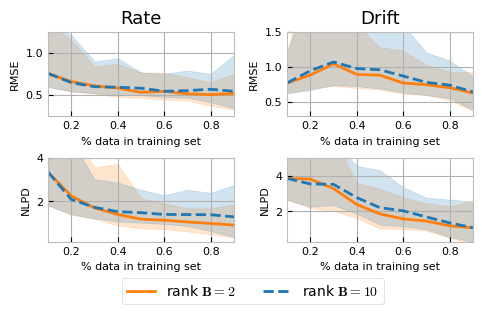

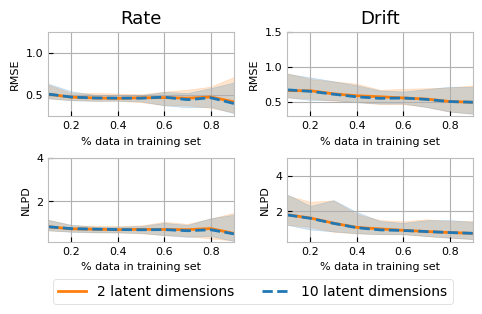

In [25]:

if X_valid_df is not None:
    titles = ['Linear Model of Coregionalisaton', 'Latent Variable Multioutput Gaussian Process']
    for j, model_names in enumerate([['lmc2', 'lmc10'], ['lvm2',  'lvm10']]):
        fig, axs = plt.subplots(nrows=2, ncols=len(params), figsize=[5, 3])
        axs = axs.flatten()
        i = 0
        param_names = ['Rate', 'Drift', 'Rate', 'Drift']
        for metric in ['RMSE_z', 'NLPD_z']:
            for param in params:
                plot_Xvalid_subplot(all_results_df, param, metric, ax=axs[i], traintest='test', model_names=model_names, legend=False)
                axs[i].set_xlim(all_results_df['pct_train'].min(),all_results_df['pct_train'].max())
                axs[i].set_title('')
                # axs[i].set_xlabel('')
                i+=1

        axs[0].set_title(f'{param_names[0]}')
        axs[1].set_title(f'{param_names[1]}')
        axs[0].set_ylim(0.25, 1.25)
        axs[1].set_ylim(0.3, 1.5)
        axs[2].set_ylim(0.15, 4)
        axs[3].set_ylim(0.3, 5)
        labels = {'lmc2':'rank $\mathbf{B}=2$', 'lvm2':'2 latent dimensions', 'lmc10':'rank $\mathbf{B}=10$', 'lvm10':'10 latent dimensions'}

        fig.legend(labels=[labels[mod_name ] for mod_name in model_names], loc="lower center", ncols=4,
                bbox_to_anchor=(0.53, -0.08))
        # fig.supxlabel(f'% data in training set')
        plt.tight_layout()
        # plt.suptitle(titles[j])
        j+=1
        plt.subplots_adjust(hspace=0.5,top=0.85)
        plt.savefig(pl.Path(os.getcwd()) /f'analysis/plots/cross_validation_diff_dims_{model_names[0][:3]}.pdf', bbox_inches='tight')
        plt.show()
    # plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # plt.savefig(f'plots/cross_validation.png', bbox_inches='tight', dpi=2000)
    # plt.savefig(f'plots/cross_validation.svg', bbox_inches='tight')